<a href="https://colab.research.google.com/github/mittshah2/Skin-Disease-Prediction-Web-Application/blob/dev/Copy_of_HAM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as p
import PIL as pil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical,normalize
import cv2
from cv2 import cvtColor
from tqdm import tqdm
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input

In [0]:
# !unzip -uq 'drive/My Drive/Actinic keratoses.zip' -d '/'
# !unzip -uq 'drive/My Drive/Basal cell carcinoma.zip' -d '/'
# !unzip -uq 'drive/My Drive/Benign keratosis-like lesions.zip' -d '/'
# !unzip -uq 'drive/My Drive/Melanocytic nevi.zip' -d '/'
# !unzip -uq 'drive/My Drive/Dermatofibroma.zip' -d '/'
# !unzip -uq 'drive/My Drive/Melanoma.zip' -d '/'
# !unzip -uq 'drive/My Drive/Vascular lesions.zip' -d '/'

In [0]:
datagen=ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True,preprocessing_function=preprocess_input)

In [0]:
input_shape=(224,224,3)

In [0]:
# data=[]
# for i in tqdm(os.listdir('/Actinic keratoses')):
#   path='/Actinic keratoses/'+str(i)
#   img=cv2.imread(path)  
#   img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   img=cv2.resize(img,input_shape[:2])
#   data.append(img)
# x=np.asarray(data)

In [0]:
# data=[]
# for i in tqdm(os.listdir('/Basal cell carcinoma')):
#   path='/Basal cell carcinoma/'+str(i)
#   img=cv2.imread(path)
#   img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   img=cv2.resize(img,input_shape[:2])
#   data.append(img)
# x=np.append(x,data,axis=0)

In [0]:
# x.shape

In [0]:
# data=[]
# for i in tqdm(os.listdir('/Benign keratosis-like lesions')):
#   path='/Benign keratosis-like lesions/'+str(i)
#   img=cv2.imread(path)
#   img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   img=cv2.resize(img,input_shape[:2])
#   data.append(img)
# x=np.append(x,data,axis=0)

In [0]:
# data=[]
# for i in tqdm(os.listdir('/Dermatofibroma')):
#   path='/Dermatofibroma/'+str(i)
#   img=cv2.imread(path)
#   img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   img=cv2.resize(img,input_shape[:2])
#   data.append(img)
# x=np.append(x,data,axis=0)

In [0]:
# data=[]
# for i in tqdm(os.listdir('/Melanocytic nevi')):
#   path='/Melanocytic nevi/'+str(i)
#   img=cv2.imread(path)
#   img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   img=cv2.resize(img,input_shape[:2])
#   data.append(img)
# x=np.append(x,data,axis=0)

In [0]:
# len(data)

In [0]:
# data=[]
# for i in tqdm(os.listdir('/Melanoma')):
#   path='/Melanoma/'+str(i)
#   img=cv2.imread(path)
#   img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   img=cv2.resize(img,input_shape[:2])
#   data.append(img)
# x=np.append(x,data,axis=0)

In [0]:
# data=[]
# for i in tqdm(os.listdir('/Vascular lesions')):
#   path='/Vascular lesions/'+str(i)
#   img=cv2.imread(path)
#   img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   img=cv2.resize(img,input_shape[:2])
#   data.append(img)
# x=np.append(x,data,axis=0)

In [0]:
# x.shape

In [0]:
# np.save('drive/My Drive/data of ham gray.npy',x)

In [0]:
x=np.load('drive/My Drive/HAM/data of ham(224x224).npy')

In [17]:
x.shape

(9895, 224, 224, 3)

In [18]:
y=[]
for i in range(130):
  y.append(0)
for i in range(514):
  y.append(1)
for i in range(1176):
  y.append(2)
for i in range(115):
  y.append(3)
for i in range(6705):
  y.append(4)
for i in range(1113):
  y.append(5)
for i in range(142):
  y.append(6)
len(y)

9895

In [19]:
y=np.asarray(y)
y.shape

(9895,)

In [20]:
y=to_categorical(y)
y.shape

(9895, 7)

In [0]:
from sklearn.model_selection import train_test_split

trainx,trainy,testx,testy = train_test_split(x,y,test_size=0.2,random_state=42)

In [0]:
datagen.fit(trainx,augment=True,seed=42)

In [0]:
pre_trained_model = MobileNetV2(input_shape = input_shape, 
                                include_top = False, 
                                weights = 'imagenet')

In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [0]:
# pre_trained_model.summary()

In [26]:
last_layer = pre_trained_model.get_layer('out_relu')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 1280)


In [0]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization

model = Flatten()(last_output)
model = Dense(512, activation='relu')(model)
model = Dropout(0.4)(model)
model=BatchNormalization()(model)
model = Dense(512, activation='relu')(model)
model = Dropout(0.4)(model)
model=BatchNormalization()(model)
model = Dense(7, activation='softmax')(model) 

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import RMSprop

recall=Recall()
fmodel = Model( pre_trained_model.input, model) 

fmodel.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy',recall])
# model.summary()

In [0]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau


early=EarlyStopping(monitor='accuracy',patience=3,mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, verbose=1,cooldown=0, mode='auto',min_delta=0.0001, min_lr=0)
batch_size=90

In [0]:
class_weight={4:1,0:57.3,1:13.04,2:6,3:58.3,5:6,6:47}

In [31]:
fmodel.fit(datagen.flow(trainx, testx,batch_size=90),epochs=50,validation_data=datagen.flow(trainy, testy,batch_size=16),callbacks=[reduce_lr,early])

Epoch 1/50
88/88 [==============================] - 11s 126ms/step - loss: 1.3806 - accuracy: 0.6004 - recall: 0.5009 - val_loss: 0.8682 - val_accuracy: 0.7297 - val_recall: 0.6665 - lr: 0.0010
Epoch 2/50
88/88 [==============================] - 10s 111ms/step - loss: 0.8724 - accuracy: 0.7283 - recall: 0.6574 - val_loss: 0.7833 - val_accuracy: 0.7231 - val_recall: 0.6544 - lr: 0.0010
Epoch 3/50
88/88 [==============================] - 10s 115ms/step - loss: 0.6767 - accuracy: 0.7663 - recall: 0.7140 - val_loss: 0.6886 - val_accuracy: 0.7575 - val_recall: 0.7069 - lr: 0.0010
Epoch 4/50
88/88 [==============================] - 10s 115ms/step - loss: 0.5278 - accuracy: 0.8181 - recall: 0.7743 - val_loss: 0.6760 - val_accuracy: 0.7630 - val_recall: 0.7084 - lr: 0.0010
Epoch 5/50
88/88 [==============================] - 10s 111ms/step - loss: 0.4170 - accuracy: 0.8552 - recall: 0.8236 - val_loss: 0.8479 - val_accuracy: 0.7443 - val_recall: 0.7322 - lr: 0.0010
Epoch 6/50
88/88 [============

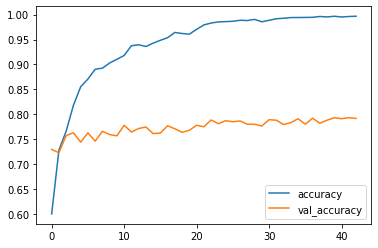

In [32]:
loss=pd.DataFrame(fmodel.history.history)
loss=loss[['accuracy','val_accuracy']]
loss.plot()

In [0]:
# model.save('drive/My Drive/model/model final(180x135).h5')